<a href="https://colab.research.google.com/github/JounKK/Algorithm/blob/main/%EB%B9%84%EC%84%A0%ED%98%95_%EC%9E%90%EB%A3%8C%EA%B5%AC%EC%A1%B0_%EA%B3%B5%EB%B6%80%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 트리
* **노드로 이루어진 자료구조**

* 트리의 기본형태
    * value
    * child - left
    * child - right


* 트리는 하나의 루트노드를 갖는다
* 루트 노드는 0개 이상의 자식 노드를 갖고 있다.
* 그 자식 노드 또한 0개 이상의 자식 노드를 갖고 있고, 이는 반복적으로 정의된다.
* 트리에는 사이클이 존재할 수 없음. 즉, 사이클이 없는 하나의 연결 그래프
* 또는 DAG(Directed Acyclic Graph, 방향성이 있는 비순환 그래프)의 한 종류

In [1]:
{
    'value': 5,
    'left': {},
    'right': {}
}

{'value': 5, 'left': {}, 'right': {}}

In [2]:
tree = {
    'root': {
        'value': 5,
        'left': {
            'value': 3,
            'left': {
                'value': 1,
                'left': None,
                'right': None
            },
            'right': {
                'value': 4,
                'left': None,
                'right': None
            }
        },
        'right': {
            'value': 8,
            'left': {
                'value': 6,
                'left': None,
                'right': None
            },
            'right': {
                'value': 9,
                'left': None,
                'right': None
            }
        }
    }
}

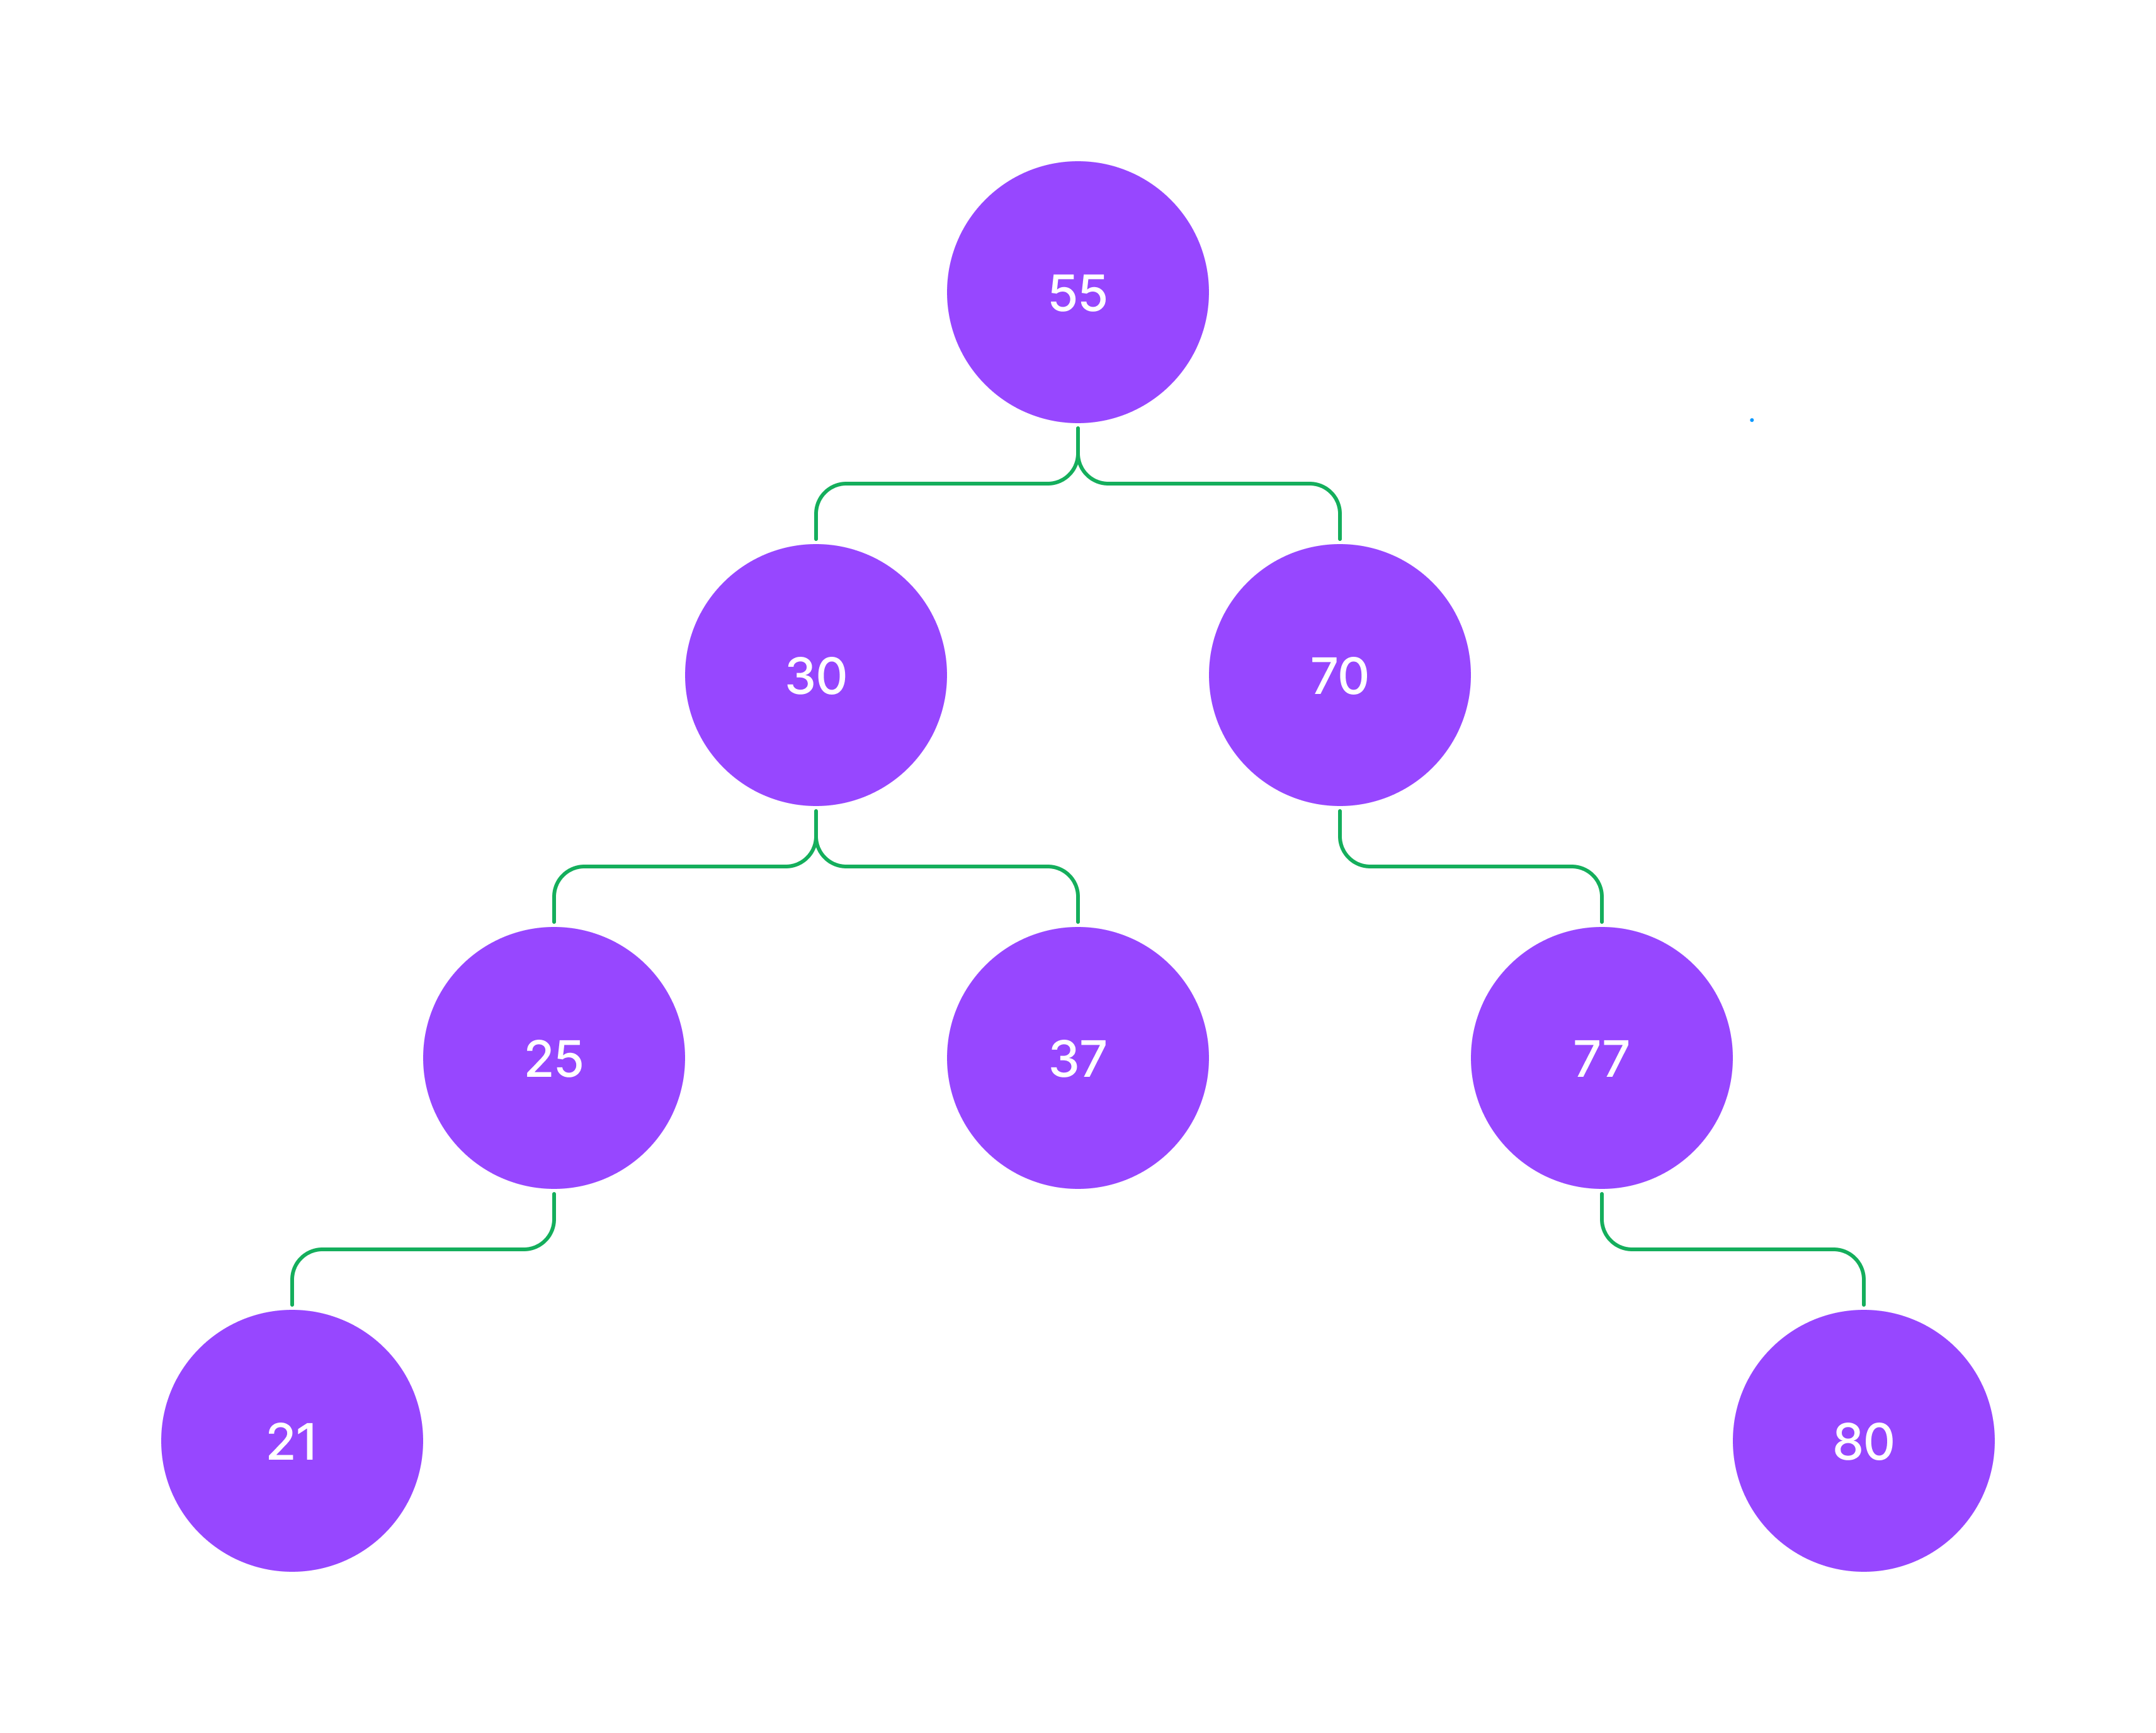

In [3]:
tree = {
    'root': {
        'value': 55,
        'left': {
            'value': 30,
            'left': {
                'value': 25,
                'left': {
                    'value' : 21,
                    'left' : None,
                    'right': None
                    },
                },
            'right': {
                'value': 37,
                'left': None,
                'right': None
                },
            },
        'right': {
            'value': 70,
            'left': None,
            'right': {
                'value': 77,
                'left': None,
                'right': {
                    'value' : 80,
                    'left': None,
                    'right': None
                },
            },
        },
    },
}

In [4]:
# 77이라는 값을 추출
tree['root']['right']['right']['value']

77

In [5]:
# 아래와 같은 형태로 Node를 만들어 진행하게 됩니다.
root = {
    'value': 55,
    'left': None,
    'right': None
}

node1 = {'value':99, 'left':None, 'right':None}
node2 = {'value':53, 'left':None, 'right':None}
node3 = {'value':37, 'left':None, 'right':None}
node4 = {'value':54,  'left':None, 'right':None}
root['right'] = node1
root['left'] = node2
node2['left'] = node3
node2['right'] = node4

root['value']
root['right']['value']
root['left']['left']['value']

37

In [6]:
# step 1 : 더블링크드리스트와 비슷
# next, pre 값이 left와 right로 바뀐 것 !
# 그리고 자식이 많으니까 child로 써서 여러명의 자식을 만들 수 있다.

class Node:
    def __init__(self, data):
        self.data = data
        # self.child = [] 2진 트리가 아닌 경우 child를 사용할 수 있습니다.
        self.left = None
        self.right = None

node1 = Node(55)
node2 = Node(99)
node3 = Node(53)
node4 = Node(37)
node5 = Node(54)

node1.left = node3
node1.right = node2
node3.left = node4
node3.right = node5

node1.data
# 55
node1.right.data
# 99
node1.left.data
# 53
node1.left.left.data
# 37

37

### 트리의 순회
1. 너비 우선 탐색(BFS, Breadth First Search)
    - 루트부터 계층별로 방문
    - 방문경로로 들어가면, 들어간 것과 연결된 노드들이 Queue에 쌓임
2. 깊이 우선 탐색(DFS, Depth First Search)
    - 방문경로에 들어가면, 들어간 것과 연결된 노드 들이 stack에 쌓임
    * 전위 순회 : 각 루트를 순차적으로 먼저 방문(root > 왼쪽 자식 > 오른쪽 자식)
    * 중위 순회 : 왼쪽 하위 트리 방문 후 루트 방문(왼쪽 자식 > root > 오른쪽 자식)
    * 후위 순회 : 왼쪽 하위 트리부터 하위 모두 방문 후 루트 방문(왼쪽 자식 > 오른쪽 자식 > root)

* **깊스너큐(깊이우선탐색은 스택, 너비우선탐색은 큐)**

* object나 array(기존 자료형)로 tree나 linked list를 구현할 수 있는데 왜 class로 구현할까요?
    1. 더 lite한 모델을 만들기 위해
    2. 확장성
    3. OOP(Object-Oriented Programming, 객체 지향 프로그래밍)에 철학에 맞기 때문에
    
    * 파이썬이 객체 지향 프로그래밍인데, 객체 지향 프로그래밍 철학이란 현실 세계를 모방한다는 것, 클래스로 모방한다는 것이다 예를 들어 게임캐릭터를 만든다고 했을 때, 딕셔너리로 'name' : '주인공' 이 아니라 클래스로 만든다는 것이다. 이로 인한 효과는 관리가 쉽고, 매직매서드를 사용하면 이를 호출했을 때 부수적인 효과들을 줄 수 있게 된다.

In [7]:
# 깊이우선탐색과 너비우선탐색 기능 추가
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class Tree:
    def __init__(self, data):
        init = Node(data)
        self.root = init
        self.데이터수 = 0

    def length(self):
        return self.데이터수

    def __len__(self):
        return self.데이터수

    def insert(self, data):
        새로운노드 = Node(data)
        순회용현재노드 = self.root

        while 순회용현재노드:
            if data == 순회용현재노드.data:
                # 데이터가 같으면 추가하지 않습니다.
                return
            if data < 순회용현재노드.data: # 왼쪽
                # 들어온 데이터가 기존의 데이터보다 작은 경우 왼쪽에 붙어야 합니다.
                # 들어온 자리가 비어있다면 그 자리를 차지하고
                # 비어있지 않으면 계속해서 다음노드를 탐색해야 합니다.
                if 순회용현재노드.left == None: #비어있다면
                    순회용현재노드.left = 새로운노드
                    self.데이터수 += 1
                    return
                순회용현재노드 = 순회용현재노드.left

            if data > 순회용현재노드.data: #오른쪽
                # 들어온 데이터가 기존의 데이터보다 큰 경우 오른쪽에 붙어야 합니다.
                # 들어온 자리가 비어있다면 그 자리를 차지하고
                # 비어있지 않으면 계속해서 다음노드를 탐색해야 합니다.
                if 순회용현재노드.right == None: #비어있다면
                    순회용현재노드.right = 새로운노드
                    self.데이터수 += 1
                    return
                순회용현재노드 = 순회용현재노드.right


    def DFS(self):
        # Stack 이용 !
        방문경로 = [] # 방문경로
        stack = [self.root]
        while len(stack) != 0:
            current = stack.pop()
            if current.right:
                stack.append(current.right)
            if current.left:
                stack.append(current.left)
            방문경로.append(current.data)
        return 방문경로

    def BFS(self):
        # Queue 이용 !
        방문경로 = [] # 방문경로
        Queue = [self.root]
        while len(Queue) != 0:
            current = Queue.pop(0)
            if current.right:
                Queue.append(current.right)
            if current.left:
                Queue.append(current.left)
            방문경로.append(current.data)
        return 방문경로

t = Tree(5)
t.insert(3)
t.insert(8)
t.insert(1)
t.insert(4)
t.insert(6)
t.insert(9)

t.DFS()
t.BFS()

[5, 8, 3, 9, 6, 4, 1]

#### 재귀함수를 같이 알아야합니다.
* 자기를 호출하는 함수. 종료를 안하면 무한히해서 오류생김
* 보통 파이썬 인터프리터는 호출 횟수 제한이 있어서 이 한계를 벗어나면 오류메시지가 뜬다.

In [10]:
def recursive_func(i):
    if i == 10:
        return
    print(i,'번째 재귀함수에서', i+1, '번째 재귀함수를 호출합니다.')
    recursive_func(i+1)
    print(i, '번째에서 재귀함수를 종료합니다.')

recursive_func(1)

# 컴퓨터 내부에서 재귀 함수의 수행은 스택 자료구조를 활용함.
# 스택 자료구조를 활용해야 하는 상당수 알고리즘은 재귀 함수를 이용해서 간편하게 구현될 수 있음

1 번째 재귀함수에서 2 번째 재귀함수를 호출합니다.
2 번째 재귀함수에서 3 번째 재귀함수를 호출합니다.
3 번째 재귀함수에서 4 번째 재귀함수를 호출합니다.
4 번째 재귀함수에서 5 번째 재귀함수를 호출합니다.
5 번째 재귀함수에서 6 번째 재귀함수를 호출합니다.
6 번째 재귀함수에서 7 번째 재귀함수를 호출합니다.
7 번째 재귀함수에서 8 번째 재귀함수를 호출합니다.
8 번째 재귀함수에서 9 번째 재귀함수를 호출합니다.
9 번째 재귀함수에서 10 번째 재귀함수를 호출합니다.
9 번째에서 재귀함수를 종료합니다.
8 번째에서 재귀함수를 종료합니다.
7 번째에서 재귀함수를 종료합니다.
6 번째에서 재귀함수를 종료합니다.
5 번째에서 재귀함수를 종료합니다.
4 번째에서 재귀함수를 종료합니다.
3 번째에서 재귀함수를 종료합니다.
2 번째에서 재귀함수를 종료합니다.
1 번째에서 재귀함수를 종료합니다.


In [14]:
# 팩토리얼 예제
def factorial_iterative(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

def factorial_recursive(n):
    if n<=1:
        return 1
    return n * factorial_recursive(n-1)

print('반복 구현: ', factorial_iterative(5))
print('재귀 구현: ', factorial_recursive(5))

반복 구현:  120
재귀 구현:  120


#### 이코테 강의 듣기 : https://youtu.be/7C9RgOcvkvo

## 이진트리

* 각각의 노드가 최대 두 개의 자식 노드를 가지는 트리 자료구조
* 자식 노드를 각각 왼쪽 자식 노드 와 오른쪽 자식 노드 라고 한다.
* 다만, 서브트리는 공백이 될 수 있다.

    - **편향 이진트리(skewed binary tree)**
        :모든 노드가 부모의 왼쪽(or 오른쪽) 자식이기 때문에 왼(or 오른)편으로 편향됨
    - **포화 이진트리(full binary tree)**
    : 이진트리가 보유할 수 있는 최대의 노드를 가짐, 높이가 h인 이진트리에서 있을 수 있는 최대 노드의 수는 2h+1 이다
    - **완전 이진트리(complete binary tree)**
    : 마지막 레벨을 제외한 모든 레벨이 완전히 채워져 있으며, 마지막 레벨의 모든 노드들이 왼쪽에서부터 채워져 있음.

### 백준 이진트리 문제
* 문제링크 : https://www.acmicpc.net/problem/1991
* 이진 트리를 입력받아 전위 순회(preorder traversal), 중위 순회(inorder traversal), 후위 순회(postorder traversal)한 결과를 출력하는 프로그램을 작성하시오.
* 입력 : 첫째 줄에는 이진 트리의 노드의 개수 N(1 ≤ N ≤ 26)이 주어진다. 둘째 줄부터 N개의 줄에 걸쳐 각 노드와 그의 왼쪽 자식 노드, 오른쪽 자식 노드가 주어진다. 노드의 이름은 A부터 차례대로 알파벳 대문자로 매겨지며, 항상 A가 루트 노드가 된다. 자식 노드가 없는 경우에는 .으로 표현한다.

In [19]:
import sys
# input = sys.stdin.readline

N = int(input())
tree = {}

for n in range(N):
    root, left, right = input().split()
    tree[root] = [left, right]

def preorder(root):
    if root != '.':
        print(root, end='') #root
        preorder(tree[root][0]) #left
        preorder(tree[root][1]) #right

def inorder(root):
    if root != '.':
        inorder(tree[root][0]) #left
        print(root, end='') #root
        inorder(tree[root][1]) #right

def postorder(root):
    if root != '.':
        postorder(tree[root][0]) #left
        postorder(tree[root][1]) #right
        print(root, end='') #root

preorder('A')
print()
inorder('A')
print()
postorder('A')

7
A B C
B D .
C E F
E . .
F . G
D . .
G . .
ABDleft : .
right : .
left : D
right : .
CEleft : .
right : .
FGleft : .
right : .
left : .
right : G
left : E
right : F
left : B
right : C

DBAECFG
DBEGFCA

### 백준 문제 2 : 전화번호 목록
* 문제링크 : https://www.acmicpc.net/problem/5052

전화번호 목록이 주어진다. 이때, 이 목록이 일관성이 있는지 없는지를 구하는 프로그램을 작성하시오.

전화번호 목록이 일관성을 유지하려면, 한 번호가 다른 번호의 접두어인 경우가 없어야 한다.

예를 들어, 전화번호 목록이 아래와 같은 경우를 생각해보자

- 긴급전화: 911
- 상근: 97 625 999
- 선영: 91 12 54 26

이 경우에 선영이에게 전화를 걸 수 있는 방법이 없다. 전화기를 들고 선영이 번호의 처음 세 자리를 누르는 순간 바로 긴급전화가 걸리기 때문이다. 따라서, 이 목록은 일관성이 없는 목록이다.


> 문제 해법 : Trie
* 입력되는 문자열을 Tree 형식으로 만들어 진행되어 보다 빠르게 문자열 검색이 가능한 자료구조입니다.
* "접두사”를 검색하거나 “단어 자체”를 검색하는 데에 특화된 문자열 집합 자료구조
* 보통 문자열이 존재하는지 확인하기 위해서는 O(n) 시간이 걸리는데, 이 알고리즘을 사용하면 O(m) (m은 문자열의 길이)이라는 짧은 시간이 소요되기 때문에 엄청 효율적
* 관련 공부링크 : https://ansohxxn.github.io/algorithm/trie/

In [23]:
class Node:
    def __init__(self, key, data=None):
        self.key = key # 값으로 입력될 문자
        self.data = data # 문자열의 종료를 알리는 flag로 사용 예정
        self.children = {} # 자식노드 저장

In [43]:
# Trie 구현
class Trie:
    def __init__(self):
        self.head = Node(None)

    def insert(self, string):
        현재노드 = self.head

        for char in string:
            if char not in 현재노드.children:
                현재노드.children[char] = Node(char)
            현재노드 = 현재노드.children[char]
        현재노드.data = string

    def search(self, string):
        현재노드 = self.head

        for char in string:
            if char in 현재노드.children:
                현재노드 = 현재노드.children[char]
            else:
                return False

        if 현재노드.data:
            return True
        else:
            return False

    def starts_with(self, prefix): #prefix단어로 시작하는 단어를 찾고 배열로 리턴하는 함수
        현재노드 = self.head
        words = []

        for p in prefix: # 주어진 접두사의 각 문자 순회
            if p in 현재노드.children:
                현재노드 = 현재노드.children[p] # 현재문자 p가 현재노드의 자식노드에 있다면, 현재노드 업뎃
            else:
                return None # 현재문자p가 자식노드에 없으면 None 리턴

        현재노드 = [현재노드]
        다음노드 = []
        while True:
            for 노드 in 현재노드: # 현재노드 리스트 순회
                if 노드.data:
                    words.append(노드.data) # 단어가 있으면 배열에 추가
                다음노드.extend(list(노드.children.values())) # 노드의 모든 자식노드를 다음노드 리스트에 추가
            if len(다음노드) != 0:
                현재노드 = 다음노드
                다음노드 = []
            else:
                break

        return words

In [44]:
trie = Trie()
word_list = ['frodo', 'front', 'firefox', 'fire']
for word in word_list:
    trie.insert(word)

In [45]:
print(trie.search("friend"))
print(trie.search("frodo"))
print(trie.search("fire"))
print(trie.starts_with("fire"))
print(trie.starts_with("fr"))
print(trie.starts_with("fo"))
print(trie.starts_with("f"))

False
True
True
['fire', 'firefox']
['frodo', 'front']
None
['fire', 'frodo', 'front', 'firefox']


깨알 정보
* 리스트 append, extend 차이
    * append : 통째로 넣는다(봉지채 넣기)
    * extend : 쪼개서 넣는다(과자 하나씩 넣기)

In [40]:
a = [1,2,3]
print('id: ', id(a))
a.append([4,5])
print('a: ', a)
print('append id: ', id(a))
print()

e = [1,2,3]
print('id: ', id(e))
e.extend([4,5])
print('e: ', e)
print('extend id: ', id(e))
print()

p = [1,2,3]
print('id: ', id(p))
p = p + [4,5]
print('p: ', p)
print('+ id: ', id(p))
print()

id:  135013987616704
a:  [1, 2, 3, [4, 5]]
append id:  135013987616704

id:  135013422075264
e:  [1, 2, 3, 4, 5]
extend id:  135013422075264

id:  135013420377664
p:  [1, 2, 3, 4, 5]
+ id:  135013420323200



In [22]:
# 문제풀이 시작

import sys
input = sys.stdin.readline

class Node:
    def __init__(self, key, data=None):
        self.key = key # 값으로 입력될 문자
        self.data = data # 문자열의 종료를 알리는 flag
        self.children = {} # 자식노드 저장

class Trie:
    def __init__(self):
        self.head = Node(None)

    def insert(self, string):
        현재노드 = self.head

        for c in string:
            if c not in 현재노드.children:
                현재노드.children[c] = Node(c)
            현재노드 = 현재노드.children[c]

        현재노드.data = string # 문자열을 다 돌면 마지막 노드의 data에 문자열을 저장

    def is_prefix(self, string):
        현재노드 = self.head

        for c in string:
            현재노드 = 현재노드.children[c]

        if not 현재노드.children:
            return False
        return True

t = int(input())
for _ in range(t):
    n = int(input())
    trie = Trie()
    nums = []
    for _ in range(n):
        num = input().rstrip()
        nums.append(num)
        trie.insert(num)

    flag = True
    nums.sort()
    for num in nums:
        if not trie.is_prefix(num):
            flag = False
            break

    print("YES") if flag else print("NO")

{}


In [ ]:
# 간단하게 푸는 법 : 왜 메모리도, 시간도 이게 더 빠른지 . . .
# 리스트에 모든 번호를 넣고, 문자열 순서대로 sort
# 현재 전체값이 다음 값의 부분집합이라면 flag out
# flag가 out 되어 있으면 일관성이 없음
t = int(input())

for _ in range(t):
    n = int(input())
    phonebook = []

    for _ in range(n):
        phonebook.append(input().rstrip()) # rstrip() : 인자가 없을 경우 오른쪽 공백 제거

    phonebook.sort()
    flag = True

    for i in range(n-1):
        if phonebook[i] == phonebook[i+1][:len(phonebook[i])]:
            flag = False
            break

    print("YES") if flag else print("NO")

### 이코테 문제 p.149 (음료수 얼려 먹기)

N x M 크기의 얼음 틀이 있다. 구멍이 뚫려 있는 부분은 0, 칸막이가 존재하는 부분은 1로 표시된다. 구멍이 뚫려 있는 부분끼리 상, 하, 좌, 우로 붙어 있는 경우 서로 연결되어 있는 것으로 간주한다. 이때 얼음 틀의 모양이 주어졌을 때 생성되는 총 아이스크림의 개수를 구하는 프로그램을 작성하시오. 다음의 4x5 얼음 틀 예시에서는 아이스크림이 총 3개 생성된다.

- 입력 조건
    * 첫 번째 줄에 얼음 틀의 세로 길이 N과 가로 길이 M이 주어진다.(1 <=N, M<= 1,000)
    * 두 번째 줄부터 N +1번째 줄까지 얼음 틀의 형태가 주어진다.
    * 이때 구멍이 뚫려있는 부분은 0, 그렇지 않은 부분은 1이다.

* 출력 조건
    * 한 번에 만들 수 있는 아이스크림의 개수를 출력한다.


In [46]:
# DFS 이용
n, m = map(int, input().split())

# 2차원 리스트의 맵 정보 입력
graph = []
for i in range(n):
    graph.append(list(map(int, input())))

# DFS로 특정 노드 방문, 연결된 모든 노드 방문
def dfs(x,y):
    if x <= -1 or x >= n or y <= -1 or y >= m:
        return False
    if graph[x][y] == 0:
        graph[x][y] = 1 # 해당위치를 방문했다는 표시
        # 상, 하, 좌, 우의 위치도 모두 재귀적으로 호출
        dfs(x -1,y)
        dfs(x,y-1)
        dfs(x+1, y)
        dfs(x, y+1)
        return True
    return False

# 모든 노드(위치)에 대하여 음료수 채우기
result = 0
for i in range(n):
    for j in range(m):
        # 현재위치에서 DFS 수행
        if dfs(i,j) == True:
            result += 1

print(result)

4 5
00110
00011
11111
00000
[[0, 0, 1, 1, 0], [0, 0, 0, 1, 1], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0]]


# 그래프

## 방향그래프

## 무방향 그래프